In [24]:
# %load ./dsfs/gradients.py
import random
from typing import Callable, List, TypeVar, Iterator
from dsfs.vector import Vector, scalar_multiply, distance, add, vector_mean

def difference_quotient(f: Callable[[float], float], x: float, h: float) -> float:
    return (f(x+h) - f(x))/ h


def partial_difference_quotient(
        f: Callable[[Vector], float],
        v: Vector,
        i: int,
        h, float) -> float:
    w = [w_j + (h if j == i else 0) for j,v_j in enumerate(v)]
    return (f(w) - f(v))/h


def estimate_gradient(
        f: Callable[[Vector], float],
        v: Vector,
        h: float = 0.0001) -> List[float]:

    return [partial_difference_quotient(f, v, i, h) for i in range(len(v))]


def gradient_step(v: Vector, gradient: Vector, step_size: float) -> Vector:
    assert len(v) == len(gradient)
    step = scalar_multiply(step_size, gradient)
    return add(v, step)


def linear_gradient(x: float, y: float, theta: Vector) -> Vector:
    slope, intercept = theta
    predicted = slope * x + intercept
    error = (predicted - y)
    squared_error = error ** 2
    grad = [2 * error * x, 2 * error]
    return grad


T = TypeVar('T')
def minibatches(dataset: Iterator[T], batch_size: int, shuffle: bool = True) -> Iterator[List[T]]:
    dataset = list(dataset)
    batch_starts = [start for start in range(0, len(dataset), batch_size)]
    if shuffle: random.shuffle(batch_starts) 

    for start in batch_starts:
        end = start + batch_size
        yield dataset[start: end]



def linear_gradient_descent(
        xs: List[float],
        ys: List[float],
        num_epochs: int,
        learning_rate: float,
        initial_weights: List[float]) -> Iterator[List[float]]:
    theta = initial_weights
    for epoch in range(num_epochs):
        grad = vector_mean([linear_gradient(x, y, theta) for x,y in zip(xs, ys)])
        theta = gradient_step(theta, gradient=grad, step_size=-learning_rate)
        yield epoch, theta


def minibatch_linear_gradient_descent(
        xs: List[float],
        ys: List[float],
        num_epochs: int,
        learning_rate: float,
        initial_weights: List[float],
        batch_size: int = 20,
        shuffle: bool = False) -> Iterator[List[float]]:
    theta = initial_weights
    for epoch in range(num_epochs):
        for batch in minibatches(zip(xs, ys), batch_size=batch_size, shuffle=shuffle):
            grad = vector_mean([linear_gradient(x, y, theta) for x,y in batch])
            theta = gradient_step(theta, gradient=grad, step_size=-learning_rate)
        yield epoch, theta
        

def stochastic_linear_gradient_descent(
        xs: List[float],
        ys: List[float],
        num_epochs: int,
        learning_rate: float,
        initial_weights: List[float]) -> Iterator[List[float]]:
    theta = initial_weights
    for epoch in range(num_epochs):
        for x, y in zip(xs, ys):
            grad = linear_gradient(x, y, theta)
            theta = gradient_step(theta, gradient=grad, step_size=-learning_rate)
        yield epoch, theta

                    



In [25]:
def square(x: float)  -> float:
    return x * x

def square_derivative(x: float) -> float:
    return 2 * x


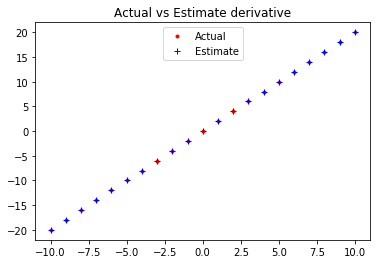

In [26]:
xs = range(-10, 11)
actuals = [square_derivative(x) for x in xs]
estimates = [difference_quotient(square, x, h=0.001) for x in xs]

import matplotlib.pyplot as plt
plt.title("Actual vs Estimate derivative")
plt.plot(xs, actuals, 'r.', label='Actual')
plt.plot(xs, estimates, 'b+', label='Estimate')
plt.legend(loc=9)
plt.show()

In [27]:
import random

def sum_of_squares_gradient(v: Vector) -> Vector:
    return [2 * v_i for v_i in v]

v = [random.uniform(-10, 10) for i in range(3)]
display(v)

for epoch in range(1000):
    grad = sum_of_squares_gradient(v)
    v = gradient_step(v, grad, -0.01)  # Taking a negative gradient step.
    if epoch % 50 == 0:
        print(epoch, v)
print(epoch, v)
assert distance(v, [0,0,0]) < 0.001

[-0.8340546960663264, -7.992427586731392, 7.405067733580545]

0 [-0.8173736021449999, -7.832579034996764, 7.256966378908934]
50 [-0.29766268320479905, -2.8523878014318322, 2.642767124610231]
100 [-0.10839972411656447, -1.0387531531318257, 0.9624156583140583]
150 [-0.039475892853061044, -0.3782824034655012, 0.35048260239906254]
200 [-0.014375923271452554, -0.13775898185261728, 0.1276351371917669]
250 [-0.005235275378721817, -0.0501676443503946, 0.04648084707900104]
300 [-0.0019065285598370836, -0.01826953499380746, 0.01692691521093801]
350 [-0.0006942998957128225, -0.0066532107140352525, 0.006164269297229054]
400 [-0.000252842970906257, -0.002422897617282396, 0.002244839977942742]
450 [-9.207774382720786e-05, -0.0008823458501695684, 0.000817502656614179]
500 [-3.353192251269781e-05, -0.0003213236059824471, 0.000297709680929554]
550 [-1.2211309494155158e-05, -0.00011701631479506666, 0.00010841683926295336]
600 [-4.446988671931262e-06, -4.261379392389281e-05, 3.9482125670446115e-05]
650 [-1.6194584420082422e-06, -1.5518651700562374e-05, 1.4378193074

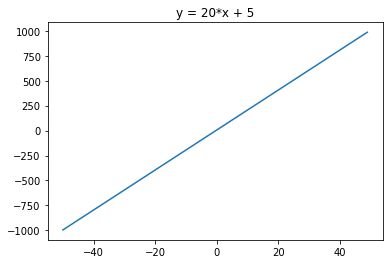

In [28]:


inputs = [(x, 20 * x + 5) for x in range(-50, 50)]
x,y = list(zip(*inputs))
plt.plot(x, y)
plt.title("y = 20*x + 5")
plt.show()

0 [33.86002196176842, 0.7324348393659211]
500 [19.99905958625259, 3.434210545743325]
1000 [19.999654283352456, 4.424381574199092]
1500 [19.999872907004264, 4.788390085767436]
2000 [19.99995327783698, 4.922207570511303]
2500 [19.9999828239117, 4.971401802662683]
3000 [19.999993685694534, 4.989486677607067]
3500 [19.999997678723304, 4.996135072905679]
4000 [19.999999146647955, 4.998579168326993]
4500 [19.999999686289136, 4.999477671222826]


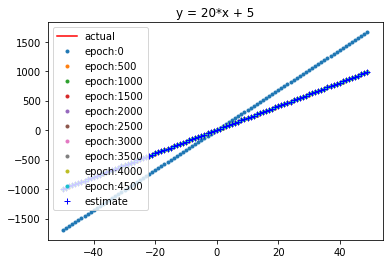

In [29]:
from dsfs.vector import vector_mean

theta =[random.uniform(-1, 1), random.uniform(-1, 1)]  #Starting at a random for the slope and interept

learning_rate = 0.001

xs, ys = list(zip(*inputs))
plt.plot(xs, ys, 'r-', label='actual')

for epoch, theta in linear_gradient_descent(
    xs, 
    ys, 
    num_epochs=5000, 
    initial_weights=theta, 
    learning_rate=learning_rate):
    if epoch % 500 == 0:
        plt.plot(xs, [x*theta[0] + theta[1] for x in xs], '.', label=f'epoch:{epoch}')
        print(epoch, theta)

slope, intercept = theta
xs, ys = list(zip(*inputs))
#plt.plot(xs, ys, 'r-', label='actual')
plt.plot(xs, [x*slope + intercept for x in xs], 'b+', label='estimate')
plt.legend()
plt.title("y = 20*x + 5")
plt.show()


0 [12.71066796993733, -0.9742698567439059]
100 [20.02920794889862, -0.4036749736909679]
200 [20.026202900837955, 0.1522799499675534]
300 [20.023507025936905, 0.6510356751833475]
400 [20.021088515039448, 1.098477118454606]
500 [20.018918831661765, 1.4998837290154123]
600 [20.016972375284684, 1.8599917820913805]
700 [20.01522617928813, 2.1830502631387962]
800 [20.013659639963514, 2.472871002456291]
900 [20.012254273406477, 2.7328736517172265]


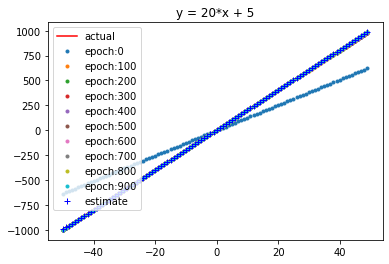

In [30]:
theta =[random.uniform(-1, 1), random.uniform(-1, 1)]  #Starting at a random for the slope and interept


xs, ys = list(zip(*inputs))
plt.plot(xs, ys, 'r-', label='actual')


for epoch, theta in minibatch_linear_gradient_descent(
    xs,
    ys,
    num_epochs=1000,
    initial_weights=theta,
    learning_rate=0.0001,
    batch_size=20,
    shuffle=False,
):
    if epoch % 100 == 0:
        print(epoch, theta)
        plt.plot(xs, [x*theta[0] + theta[1] for x in xs], '.', label=f'epoch:{epoch}')
    
slope, intercept = theta
xs, ys = list(zip(*inputs))
#plt.plot(xs, ys, 'r-', label='actual')
plt.plot(xs, [x*slope + intercept for x in xs], 'b+', label='estimate')
plt.legend()
plt.title("y = 20*x + 5")
plt.show()


0 [20.107511172568937, -0.13156652549158568]
20 [20.088048514466852, 0.7973981869118749]
40 [20.072109139508072, 1.5581929204388667]
60 [20.059055260978337, 2.181261394780458]
80 [20.04836451901952, 2.6915361201569343]


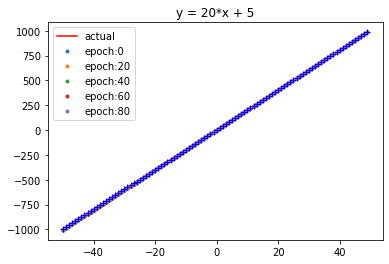

In [10]:
theta =[random.uniform(-1, 1), random.uniform(-1, 1)]  #Starting at a random for the slope and interept


xs, ys = list(zip(*inputs))
plt.plot(xs, ys, 'r-', label='actual')


for epoch, theta in stochastic_linear_gradient_descent(
    xs,
    ys,
    num_epochs=100,
    initial_weights=theta,
    learning_rate=0.0001,
):
    if epoch % 20 == 0:
        print(epoch, theta)
        plt.plot(xs, [x*theta[0] + theta[1] for x in xs], '.', label=f'epoch:{epoch}')
    
slope, intercept = theta
xs, ys = list(zip(*inputs))
plt.legend()
plt.plot(xs, [x*slope + intercept for x in xs], 'b+', label='estimate')
plt.title("y = 20*x + 5")
plt.show()